In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test2 = pd.read_csv('model2_encoded.csv')
test2

,Area,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,158,830,0,50,2407,N,219,1283
1,277,1109,0,2,2215,N,284,1273
2,315,1153,1,40,1407,N,35,1273
3,497,1153,1,80,2217,N,284,235
4,195,579,1,80,1706,N,284,1227
...,...,...,...,...,...,...,...,...
6297,806,274,1,80,670,Y,284,1273
6298,806,843,1,80,670,Y,284,1273
6299,508,1190,1,80,670,Y,284,1273
6300,763,1409,1,80,670,Y,284,1273


In [41]:
X = test2.drop(labels='Fatal (Y/N)', axis=1)

y = test2['Fatal (Y/N)']
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression()
#clf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(random_state=42)
#clf = clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

from sklearn import metrics
print('Train Accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Train Precision:', metrics.precision_score(y_train, clf.predict(X_train), average='macro'))
print('Train Recall:', metrics.recall_score(y_train, clf.predict(X_train), average='macro'))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Test Precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('Test Recall:', metrics.recall_score(y_test, y_pred, average='macro'))
#prediction_df = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
#prediction_df
#prediction_df.to_csv('rf_model_2.csv', index=False)
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

Train Accuracy: 0.7990478079746082
Train Precision: 0.28676284319583606
Train Recall: 0.2577398016409224
Test Accuracy: 0.7755749405233942
Test Precision: 0.4261810665112552
Test Recall: 0.3681185997530685


C:\Users\15309\anaconda3\envs\Python_Data\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\15309\anaconda3\envs\Python_Data\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [42]:
col_sorted_by_importance=clf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':clf.feature_importances_[col_sorted_by_importance]
})

import plotly_express as px
px.bar(feat_imp, x='cols', y='imps')

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.741 (0.015)


>1 mean=0.8045 se=0.005
>2 mean=0.8032 se=0.004
>3 mean=0.8035 se=0.004
>4 mean=0.8042 se=0.003
>5 mean=0.8040 se=0.003
>6 mean=0.8044 se=0.003
>7 mean=0.8045 se=0.002
>8 mean=0.8046 se=0.002
>9 mean=0.8049 se=0.002
>10 mean=0.8046 se=0.002
>11 mean=0.8047 se=0.002
>12 mean=0.8049 se=0.002
>13 mean=0.8049 se=0.002
>14 mean=0.8050 se=0.002
>15 mean=0.8049 se=0.002


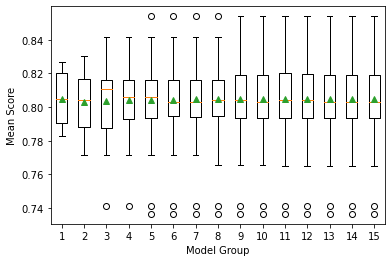

<Figure size 432x288 with 0 Axes>

In [38]:
from scipy.stats import sem
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = clf
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.xlabel('Model Group')
plt.ylabel('Mean Score')
plt.show()
#plt.savefig('box_plot.png')